In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_excel("mall.xlsx")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop("CustomerID",axis =1,inplace =True)

In [5]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

In [7]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# visualization

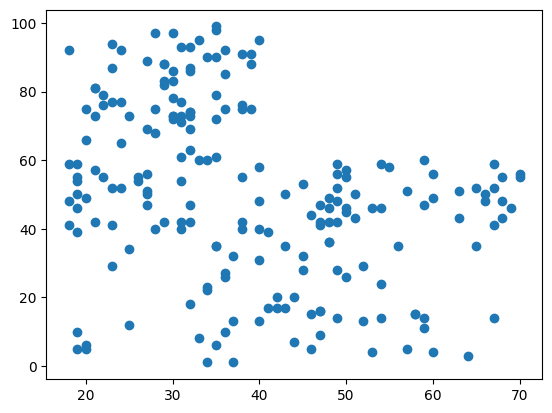

In [9]:
plt.scatter(df.Age,df.Score)

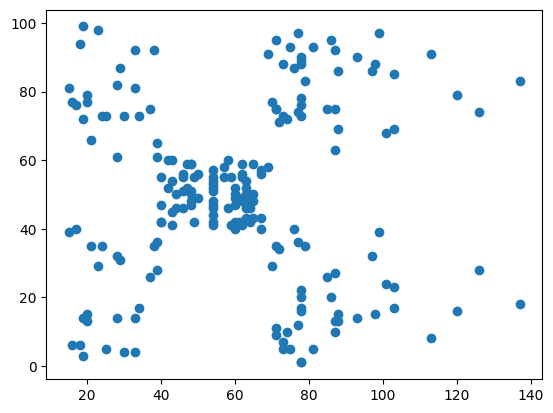

In [10]:
plt.scatter(df.Income,df.Score)

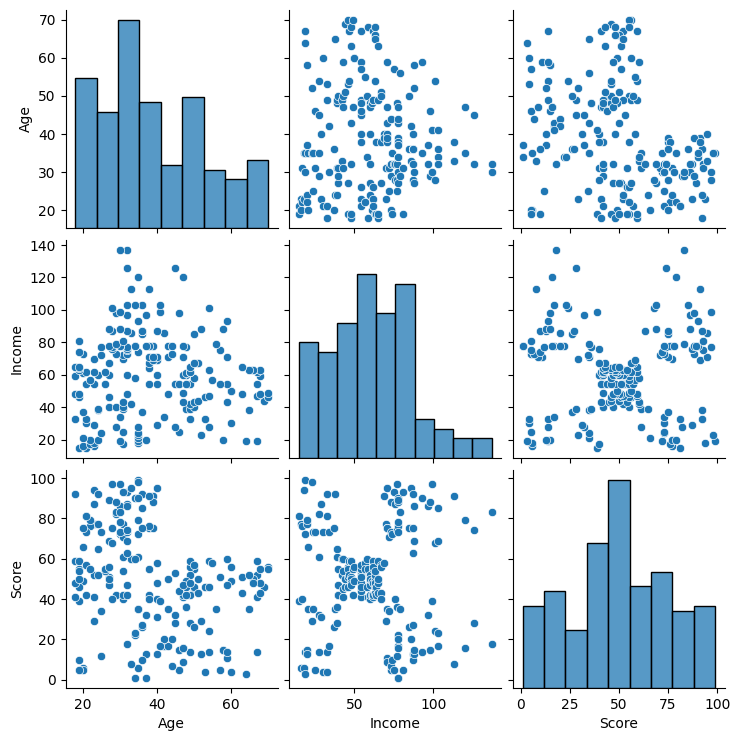

In [11]:
sns.pairplot(df[['Age','Income','Score']]) #nijeder shapekkhe dbe histplot, onner shapekkhe dbe scatter plot

In [12]:
import sklearn.cluster as cluster 

In [13]:
kmeans =cluster.KMeans()

In [15]:
pred=kmeans.fit_predict(df[['Income','Score']])
import warnings
warnings.filterwarnings("ignore")

In [16]:
pred

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 6, 0, 6, 2, 6, 2, 6,
       0, 6, 2, 6, 2, 6, 2, 6, 2, 6, 0, 6, 2, 6, 0, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 0, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3,
       7, 3])

In [17]:
df2=df.copy()
df3 =df.copy()

In [18]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
df2['Predicted']= pred

In [20]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,5
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5


In [21]:
centers=kmeans.cluster_centers_
centers

array([[ 62.58333333,  47.29166667],
       [ 45.51282051,  51.51282051],
       [ 79.73913043,  13.39130435],
       [108.18181818,  82.72727273],
       [ 24.95      ,  81.        ],
       [ 25.14285714,  19.52380952],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ]])

In [22]:
df0=df2[df2.Predicted==0]
df1=df2[df2.Predicted==1]
df8=df2[df2.Predicted==2]
df3=df2[df2.Predicted==3]
df4=df2[df2.Predicted==4]
df5=df2[df2.Predicted==5]
df6=df2[df2.Predicted==6]
df7=df2[df2.Predicted==7]

In [23]:
df0.head()

,Gender,Age,Income,Score,Predicted
74,Male,59,54,47,0
77,Male,40,54,48,0
79,Female,49,54,42,0
82,Male,67,54,41,0
83,Female,46,54,44,0


In [24]:
df1.head()

,Gender,Age,Income,Score,Predicted
27,Male,35,28,61,1
40,Female,65,38,35,1
42,Male,48,39,36,1
43,Female,31,39,61,1
45,Female,24,39,65,1


In [25]:
df3.head()

,Gender,Age,Income,Score,Predicted
179,Male,35,93,90,3
181,Female,32,97,86,3
183,Female,29,98,88,3
185,Male,30,99,97,3
187,Male,28,101,68,3


In [26]:
df5.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,5
2,Female,20,16,6,5
4,Female,31,17,40,5
6,Female,35,18,6,5
8,Male,64,19,3,5


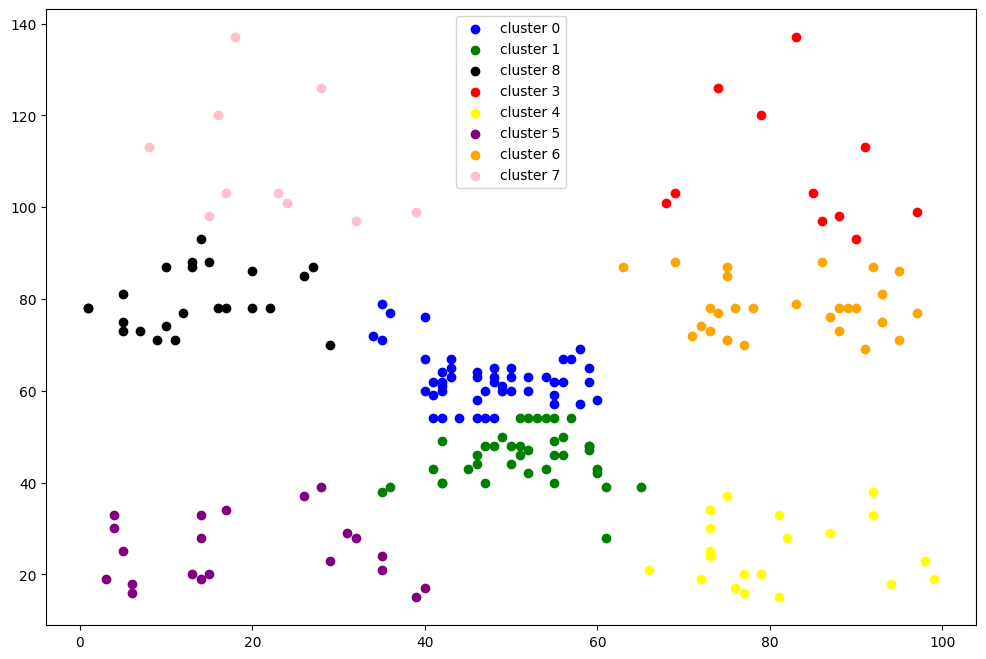

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df8['Score'],df8['Income'],color='black',label='cluster 8')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'],color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'],color='orange',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'],color='pink',label='cluster 7')

plt.legend()

# Elbow Method for optimal solution

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss= []

In [33]:
cluster= range(1,15)

for k in cluster:
    kmean =KMeans(n_clusters=k)
    kmean.fit(df[['Income','Score']])
    wcss.append(kmean.inertia_)

In [34]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25007.38394731206,
 21838.863692828912,
 19653.383606248826,
 17768.488379594262,
 16124.674096574887,
 14321.881821120058,
 13334.557041556653]

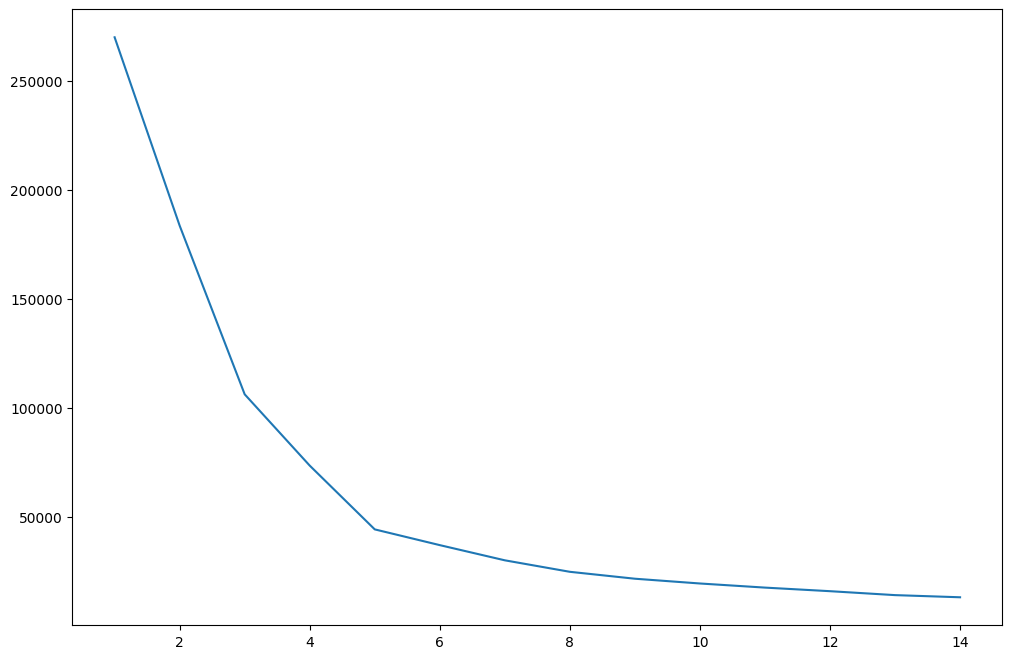

In [35]:
plt.figure(figsize=(12,8))
plt.plot(cluster,wcss)

In [44]:
!pip install kneed

In [45]:
!python -m pip install --upgrade pip

In [47]:
from kneed import KneeLocator

In [50]:
kn=KneeLocator(cluster,wcss,direction ='decreasing',curve='convex' )

In [51]:
kn

In [54]:
print('Optimal number of cluster is : ',kn.knee)

Optimal number of cluster is :  5


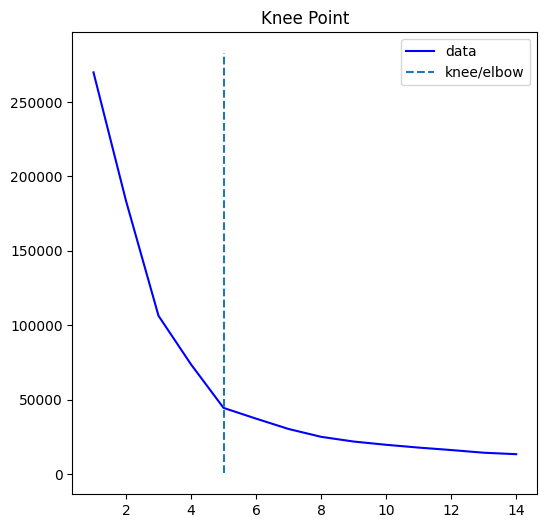

In [55]:
kn.plot_knee()

# After select best k

In [56]:
import sklearn.cluster as cluster

In [57]:
kmeans=cluster.KMeans(n_clusters=5)

In [58]:
predicted =kmeans.fit_predict(df[['Income','Score']])
predicted

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [59]:
df["Predicted"]=predicted

In [60]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4


In [61]:
center2=kmeans.cluster_centers_
center2

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

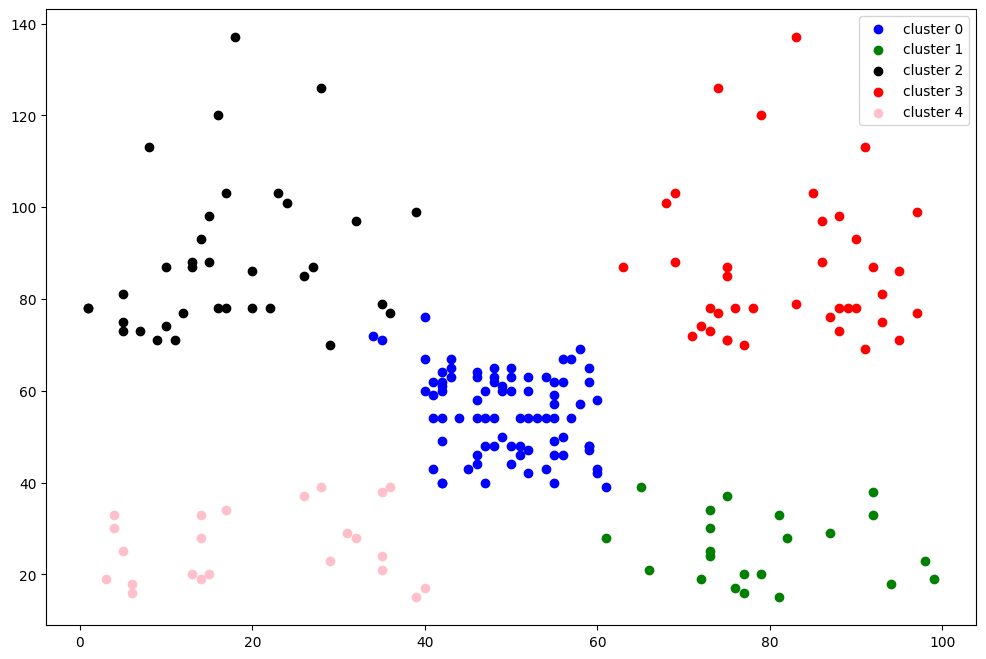

In [66]:
df0=df[df.Predicted==0]
df1=df[df.Predicted==1]
df2=df[df.Predicted==2]
df3=df[df.Predicted==3]
df4=df[df.Predicted==4]


plt.figure(figsize=(12,8))
plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='black',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='pink',label='cluster 4')

plt.legend()